# MLP Model

### Imports

In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from utils import data, eval, models, train

### Initialize Dataset

In [2]:
# Constants
DATA_DIR = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
SAVE_MODEL_FILE = 'models/mlp.pt'
SEED = 0
NUM_SAMPLES = 10000
DATASET_SPLIT = [0.4, 0.3, 0.3] # Train / Valid / Test Split
BATCH_SIZE = 100
LEARN_RATE = 5e-4
EPOCHS = 50
IMAGE_SIZE = (100, 100)
WEIGHT_DECAY = 1e-3

In [3]:
# Seed PyTorch
torch.manual_seed(SEED)

# Image transforms
trans = T.Compose([
    T.ToTensor(),
    T.Resize(IMAGE_SIZE),
    T.Normalize((0.5190, 0.4992, 0.5140), 
                (0.2244, 0.2523, 0.2616))
])

# Initialize datasets
dataset = torchvision.datasets.ImageFolder(
    root=DATA_DIR,
    transform=trans
)

# Split dataset into training, validation and test sets
train_loader, valid_loader, test_loader = data.split_dataset(dataset, NUM_SAMPLES, DATASET_SPLIT, BATCH_SIZE, SEED)

# Check for CUDA GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


### Model

In [4]:
# Instantiate model and move to GPU if available
model = models.MLP()
model = model.to(device)

### Training

In [5]:
# Train model and save model weights and training metrics
metrics = train.train_model(model, train_loader, valid_loader, LEARN_RATE, EPOCHS, device, WEIGHT_DECAY)
data.save_model(SAVE_MODEL_FILE, model, metrics)

Epoch 1 | Loss = 2.7133 | Train Accuracy = 23.33% | Valid Accuracy = 19.37% | Time = 0:00:24
Epoch 2 | Loss = 2.3425 | Train Accuracy = 32.48% | Valid Accuracy = 26.80% | Time = 0:00:19
Epoch 3 | Loss = 2.1162 | Train Accuracy = 42.23% | Valid Accuracy = 34.50% | Time = 0:00:20
Epoch 4 | Loss = 1.8369 | Train Accuracy = 47.50% | Valid Accuracy = 39.30% | Time = 0:00:21
Epoch 5 | Loss = 1.7262 | Train Accuracy = 50.52% | Valid Accuracy = 39.77% | Time = 0:00:23
Epoch 6 | Loss = 1.4683 | Train Accuracy = 59.52% | Valid Accuracy = 49.60% | Time = 0:00:26
Epoch 7 | Loss = 1.3695 | Train Accuracy = 64.05% | Valid Accuracy = 51.53% | Time = 0:00:25
Epoch 8 | Loss = 1.3145 | Train Accuracy = 63.12% | Valid Accuracy = 51.23% | Time = 0:00:24
Epoch 9 | Loss = 1.2020 | Train Accuracy = 67.65% | Valid Accuracy = 54.50% | Time = 0:00:24
Epoch 10 | Loss = 1.1818 | Train Accuracy = 69.33% | Valid Accuracy = 55.27% | Time = 0:00:25
Epoch 11 | Loss = 1.0869 | Train Accuracy = 69.75% | Valid Accuracy =

### Evaluation

Final Train Accuracy = 83.08%
Final Valid Accuracy  = 67.77%
Average Epoch Time   = 24.87s


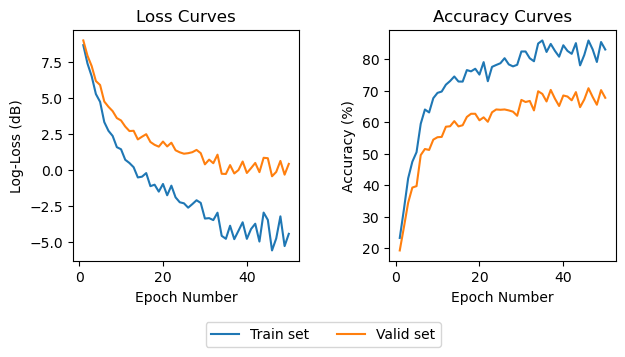

In [5]:
# Load model and show trainig and evaluation metrics
metrics = data.load_model(SAVE_MODEL_FILE, model)
eval.plot_metrics(metrics)

Precision = 0.6937
Recall = 0.6618
F1 = 0.6655
Accuracy = 66.17 %


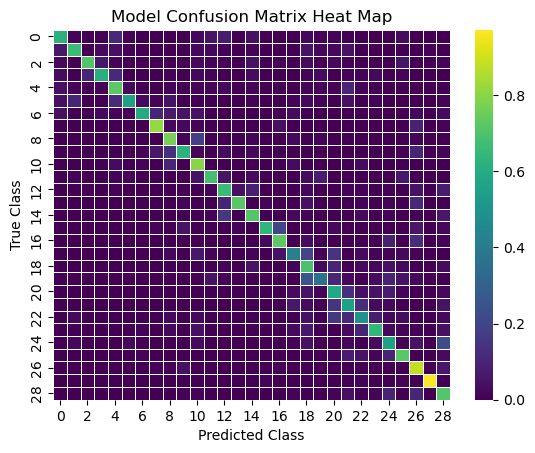

In [7]:
eval_metrics = eval.eval_model(model, test_loader, device)